In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Datadirectory = "Dataset/train/"

In [3]:
Classes = ["0","1","2","3"]

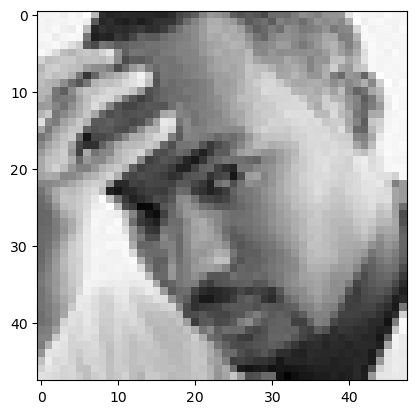

In [4]:
for category in Classes:
    path = os.path.join(Datadirectory, category) ## //
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb b = cv2.cvtColor(img_array, cv2. COLOR_GRAY2RGB)
        plt. imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break


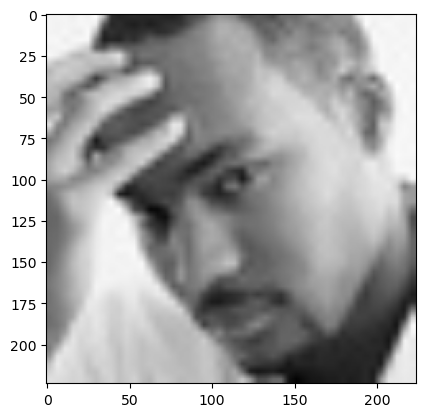

In [5]:
img_size= 224 ## ImageNet => 224 x 224
new_array= cv2.resize(img_array, (img_size, img_size))
plt. imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
new_array.shape

(224, 224, 3)

# Reading all that images and storing in a array

In [7]:
training_Data = [] ## data array
 
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1, ## Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array= cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

9308


In [10]:
import random

random.shuffle(training_Data)

In [11]:
X = [] ## data /feature

y = [] ## Label

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) ## converting it to 4 dimension 

In [12]:
X.shape

(9308, 224, 224, 3)

In [14]:
# narmalizing the Data 

X = X/255.0 ## 255 is the highest number for color (black)

In [15]:
y[0]

0

In [16]:
Y = np.array(y)

In [17]:
Y.shape

(9308,)

# Deep Learning Model for training - Transfer Learning

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.MobileNetV2() ## Pre-trained Model

In [20]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

# Transfer Learning - Tuning, Weights will start from last check point

In [21]:
base_input = model.layers[0].input

In [22]:
base_output = model.layers[-2].output

In [23]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [24]:
final_output = layers.Dense(128)(base_output) ## adding new layer, after the output of global pooling layer
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput)

In [25]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [26]:
new_model = keras.Model(inputs = base_input, outputs=final_output)

In [27]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

#  Model training

In [28]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [29]:
new_model.fit(X,Y, epochs = 15)

Epoch 1/15
291/291 [==============================] - 609s 2s/step - loss: 1.0210 - accuracy: 0.5611
Epoch 2/15
291/291 [==============================] - 620s 2s/step - loss: 0.8436 - accuracy: 0.6527
Epoch 3/15
291/291 [==============================] - 611s 2s/step - loss: 0.7685 - accuracy: 0.6867
Epoch 4/15
291/291 [==============================] - 611s 2s/step - loss: 0.7038 - accuracy: 0.7170
Epoch 5/15
291/291 [==============================] - 619s 2s/step - loss: 0.6669 - accuracy: 0.7298
Epoch 6/15
291/291 [==============================] - 609s 2s/step - loss: 0.6130 - accuracy: 0.7572
Epoch 7/15
291/291 [==============================] - 605s 2s/step - loss: 0.5589 - accuracy: 0.7809
Epoch 8/15
291/291 [==============================] - 634s 2s/step - loss: 0.5078 - accuracy: 0.8021
Epoch 9/15
291/291 [==============================] - 626s 2s/step - loss: 0.4539 - accuracy: 0.8227
Epoch 10/15
291/291 [==============================] - 596s 2s/step - loss: 0.4010 - accura

# Testing the model

In [30]:
Datadirectory = "Dataset/test/"

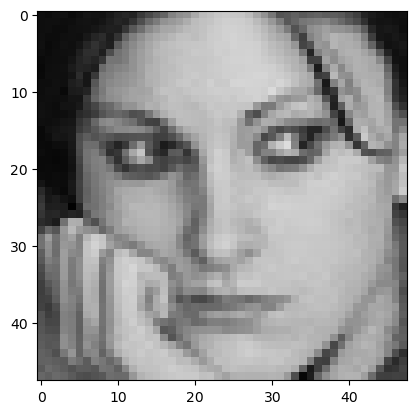

In [31]:
Classes = ["0","1","2","3"]

for category in Classes:
    path = os.path.join(Datadirectory, category) ## //
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        #backtorgb b = cv2.cvtColor(img_array, cv2. COLOR_GRAY2RGB)
        plt. imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break


In [47]:
test_Data = [] ## data array
 
def create_test_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1, ## Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array= cv2.resize(img_array, (img_size, img_size))
                test_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [48]:
create_test_Data()

In [49]:
print(len(test_Data))

2458


In [57]:
N = [] ## data /feature

m = [] ## Label

for features, label in test_Data:
    N.append(features)
    m.append(label)

N = np.array(N).reshape(-1, img_size, img_size, 3) ## converting it to 4 dimension 

In [58]:
N.shape

(2458, 224, 224, 3)

In [59]:
# narmalizing the Data 

N = N/255.0 ## 255 is the highest number for color (black)

In [60]:
m[0]

0

In [61]:
M = np.array(m)

In [62]:
M.shape

(2458,)

In [63]:
new_model.evaluate(N,M)

77/77 [==============================] - 28s 346ms/step - loss: 3.9817 - accuracy: 0.4190


[3.98168683052063, 0.41903987526893616]

# Converting model to TFLite


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
    f.write(tflite_model)